### **Proyecto Final: Análisis de Ventas de Cafeterías**

- En este tercer notebook se desarrollarán las siguientes actividades: Creación de nuevas variables, Análisis univariado y visualizaciones, Análisis de Correlación, Análisis multivariado y visualizaciones.
- Para lograr lo anterior, se trabajará con el Dataset modificado que se creó en la etapa anterior de `Limpieza de datos`.

#### I. Importación de Librerias

In [2]:
# A continuación se realiza la importación de las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### II. Carga de datos Nuevo Dataset (modificado en la limpieza de datos)

In [3]:
# Carga de datos desde archivo CSV
df = pd.read_csv(r'.\ventas_cafeterias_nuevo.csv')
# Tamaño del DataFrame
print(f"Dimensiones del DataFrame: {df.shape}")
# Mostrar primeras 5 filas
df.head()

Dimensiones del DataFrame: (149116, 8)


,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail
0,2023-01-01,1900-01-01 07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2023-01-01,1900-01-01 07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,2023-01-01,1900-01-01 07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,2023-01-01,1900-01-01 07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,2023-01-01,1900-01-01 07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


#### III. Creación de variables

##### 1. Explicación nuevas variables

- A continuación, se detallan las variables que se crearán para comenzar a realizar los diferentes análisis.

`1. day (Día):`

    - Tipo de dato: String.
    - Qué refleja: Corresponde al día en que se realizó la transacción, pero escrito en palabras (ej.: "Monday", "Tuesday", etc).
    - Usabilidad: Permitirá crear gráficos e identificar por ejemplo, qué día de la semana se vende mayor cantidad de productos.
    
`2. month (Mes):`
    
    - Tipo de dato: String.
    - Qué refleja: corresponde al mes en que se realizó la transacción, pero escrito en palabras(ej.: "January", "February", "March", etc).
    - Usabilidad: Permitirá crear gráficos y demostrar el comportamiento de una variable en un rango de meses.

`3. year (Año):`

    - Tipo de dato: Int.
    - Qué refleja: Corresponde al año en que se realizó la transacción.
    - Usabilidad: Dado que el dataset solo contine valores de 1 año, si lo vemos desde el punto de vista de la aplicación (punto 7 de la evaluación), nos permitiría conocer por ejemplo, cómo ha sido el evolutivo de las ventas de las tiendas durantes "x" años, hacer comparativos, etc. 
    
`4. hour (Hora):` 
    
    - Tipo de dato: Int.
    - Qué refleja: Corresponde a la hora en que se realizó la transacción, mostrará solo la hora en números (ej.: hora transacción 09:35:10 ==> 9).
    - Usabilidad: Permitirá crear gráficos e identificar por ejemplo, los horarios en que existe mayor demanda de productos.

`5. revenue (Ingresos):` 
    
    - Tipo de dato: float.
    - Qué refleja: Corresponde al monto percibido en cada transacción (resultado de multiplicar: transaction_qty * unit_price).
    - Usabilidad: Permitirá crear gráficos e identificar por ejemplo, cuáles son los productos que generan mayores ingresos, o comparar cuál de las 3 sucursales ha vendido más.

##### 2. Creación de Variables


- Se ha detectado que el tipo de dato de las columnas transaction_date y transaction_time (nuevo dataset), han vuelto a ser tipo object (class str). Por lo tanto, se deben transformar a tipo Datetime para poder crear las nuevas variables.

In [14]:
# Visualización del tipo de dato de las columnas del nuevo dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_date  149116 non-null  object 
 1   transaction_time  149116 non-null  object 
 2   transaction_qty   149116 non-null  int64  
 3   store_location    149116 non-null  object 
 4   unit_price        149116 non-null  float64
 5   product_category  149116 non-null  object 
 6   product_type      149116 non-null  object 
 7   product_detail    149116 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 9.1+ MB


In [16]:
# Cambio del tipo de dato de la columna transaction_date 
df["transaction_date"] = pd.to_datetime(df["transaction_date"])
# Cambio del tipo de dato de la columna transaction_time
df["transaction_time"] = pd.to_datetime(df["transaction_time"])
df["transaction_time"] = pd.to_datetime(df["transaction_time"], format = "%H:%M:%S")

In [17]:
# Validación del cambio realizado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_date  149116 non-null  datetime64[ns]
 1   transaction_time  149116 non-null  datetime64[ns]
 2   transaction_qty   149116 non-null  int64         
 3   store_location    149116 non-null  object        
 4   unit_price        149116 non-null  float64       
 5   product_category  149116 non-null  object        
 6   product_type      149116 non-null  object        
 7   product_detail    149116 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 9.1+ MB


In [18]:
# Creación de nuevas variables

# Variable "day"
df["day"] = df["transaction_date"].dt.day_name()

# Variable "month"
df["month"] = df["transaction_date"].dt.month_name()

# Variable "year"
df["year"] = df["transaction_date"].dt.year

# Variable "hour"
df["hour"] = df["transaction_time"].dt.hour

# Variable "revenue"
df["revenue"] = df["transaction_qty"] * df["unit_price"]

In [19]:
# Mostrar primeras 5 filas del dataframe con las nuevas columnas incorporadas
df.head()

,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,day,month,year,hour,revenue
0,2023-01-01,1900-01-01 07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,Sunday,January,2023,7,6.0
1,2023-01-01,1900-01-01 07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday,January,2023,7,6.2
2,2023-01-01,1900-01-01 07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,Sunday,January,2023,7,9.0
3,2023-01-01,1900-01-01 07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,Sunday,January,2023,7,2.0
4,2023-01-01,1900-01-01 07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday,January,2023,7,6.2


#### IV. Análisis Univariado y Visualizaciones

- En este apartado se analizarán las columnas: transaction_date (day, month, year), transaction_time (hour), transaction_qty, store_location, unit_price y product_category. Esto permitirá conocer cómo se encuentran constituidas y qué información podemos inferir a partir de ellas.

- Para crear los gráficos en esta sección se utilizarán las librerías de seaborn, matplotlib, plotly.

##### 1. Análisis de la Columna: **`transaction_date`**

In [90]:
# Revisámos valores únicos
df["transaction_date"].unique()

<DatetimeArray>
['2023-01-01 00:00:00', '2023-01-02 00:00:00', '2023-01-03 00:00:00',
 '2023-01-04 00:00:00', '2023-01-05 00:00:00', '2023-01-06 00:00:00',
 '2023-01-07 00:00:00', '2023-01-08 00:00:00', '2023-01-09 00:00:00',
 '2023-01-10 00:00:00',
 ...
 '2023-06-21 00:00:00', '2023-06-22 00:00:00', '2023-06-23 00:00:00',
 '2023-06-24 00:00:00', '2023-06-25 00:00:00', '2023-06-26 00:00:00',
 '2023-06-27 00:00:00', '2023-06-28 00:00:00', '2023-06-29 00:00:00',
 '2023-06-30 00:00:00']
Length: 181, dtype: datetime64[ns]

In [91]:
# Debido a que se crearon las variables Año, mes y día a partir de transaction_date, podemos ir analizando cada una de ellas

# 1. Revisemos valores únicos de Año
df["year"].unique()

array([2023], dtype=int32)

- **Observación:** Podemos observar que el dataframe sólo contiene transacciones del año 2023.

In [92]:
# 2. Revisemos valores únicos de Mes
df["month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [93]:
# Revisamos las transacciones totales por mes
month_qty = df["month"].value_counts()
month_qty

month
June        35352
May         33527
April       25335
March       21229
January     17314
February    16359
Name: count, dtype: int64

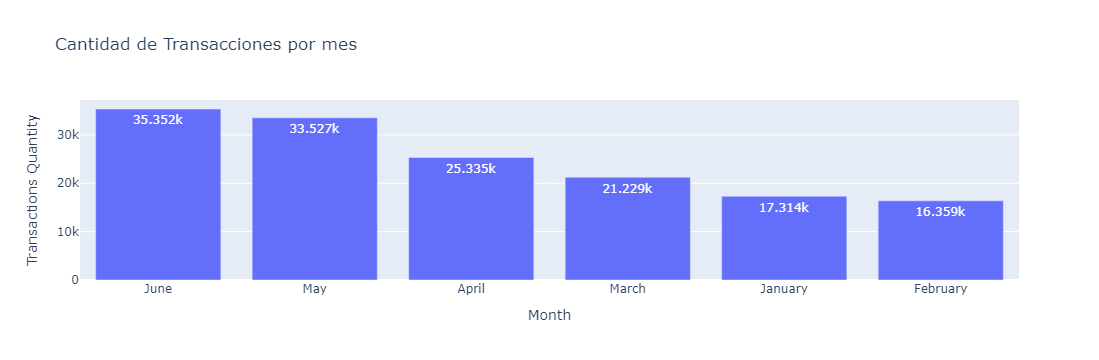

In [94]:
# Configuración gráfico
fig = px.bar(x=month_qty.index, y=month_qty.values,
             labels={'x': 'Month', 'y': 'Transactions Quantity'},
             title='Cantidad de Transacciones por mes',
             text_auto=True)

# Mostrar el gráfico
fig.show()

- **Observación:** Podemos apreciar que durante el més de Junio 2023 es cuando se realizaron la mayor cantidad de transacciones o ventas en las cafeterías. Además, podemos observar que han ido en incremento a partir de marzo (en febrero tuvo una leve baja).
- **Gráfico utilizado:** Se ha utilizado un gráfico de barras vertical (librería plotly). Es amigable a simple vista y permite identificar claramente valores superiores e inferiores.

In [95]:
# 3. Revisemos valores únicos de Dia
df["day"].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [96]:
# Revisamos las transacciones totales por día
day_qty = df["day"].value_counts()
day_qty

day
Friday       21701
Thursday     21654
Monday       21643
Wednesday    21310
Tuesday      21202
Sunday       21096
Saturday     20510
Name: count, dtype: int64

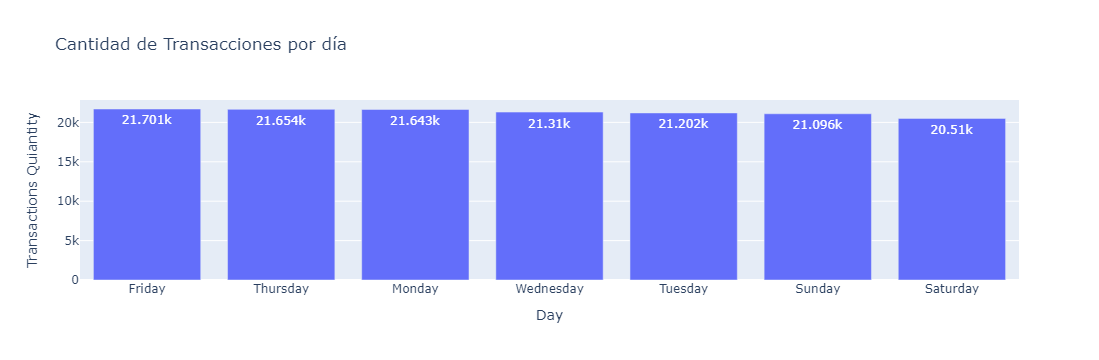

In [97]:
# Configuración gráfico
fig = px.bar(x=day_qty.index, y=day_qty.values,
             labels={'x': 'Day', 'y': 'Transactions Quiantity'},
             title='Cantidad de Transacciones por día',
             text_auto=True)

# Mostrar el gráfico
fig.show()

- **Observación:** Podemos apreciar que durante los días Viernes, Jueves y Lunes es cuando existen mayores ventas. Puede tener relación con los días en que las personas están más cansadas y necesitan consumir este tipo de productos que los mantiene más enérgicos (ejemplo: Café).
- **Gráfico utilizado:** Se ha utilizado un gráfico de barras vertical (librería plotly). Es amigable a simple vista y permite identificar claramente valores superiores e inferiores.

##### 2. Análisis de la Columna: **`transaction_time`**

In [98]:
# Revisámos valores únicos
df["transaction_time"].unique()

<DatetimeArray>
['1900-01-01 07:06:11', '1900-01-01 07:52:36', '1900-01-01 07:08:56',
 '1900-01-01 13:58:10', '1900-01-01 07:14:04', '1900-01-01 07:20:24',
 '1900-01-01 07:22:41', '1900-01-01 07:25:49', '1900-01-01 07:33:34',
 '1900-01-01 07:39:13',
 ...
 '1900-01-01 18:12:01', '1900-01-01 18:38:30', '1900-01-01 19:19:51',
 '1900-01-01 19:50:14', '1900-01-01 19:53:03', '1900-01-01 19:53:41',
 '1900-01-01 19:57:52', '1900-01-01 10:34:30', '1900-01-01 12:03:24',
 '1900-01-01 16:59:49']
Length: 25762, dtype: datetime64[ns]

In [99]:
# Debido a que cambiamos el tipo de dato a datetime, muestra la fecha y hora de la transacción. En este caso sólo nos intera rescatar la hora (Variable creada)

# Revisemos valores únicos de Hora
df["hour"].unique()

array([ 7, 13,  8,  9, 11, 10, 12, 14, 15, 17, 16, 19, 18,  6, 20],
      dtype=int32)

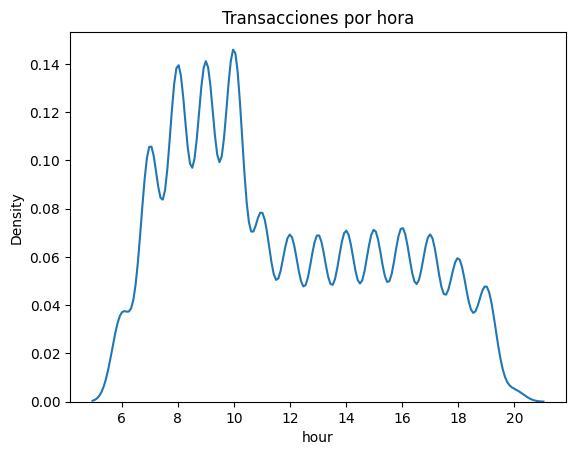

In [100]:
sns.kdeplot(df["hour"])
plt.title('Transacciones por hora')
plt.grid(False)
plt.show()

- **Observación:** Podemos apreciar que durante los horarios de la mañana (a.m.), es cuando existe la mayor cantidad de transacciones.
- **Gráfico utilizado:** Se ha utilizado un gráfico de Densidad de Kernel (librería matplotlib y seaborn). Mediante los picos más altos podemos apreciar en qué horarios ocurre la mayor cantidad de transacciones. 

##### 3. Análisis de la Columna: **`transaction_qty`**

In [101]:
# Revisámos valores únicos
df["transaction_qty"].unique()

array([2, 1, 3, 4, 8, 6])

In [102]:
# Revisamos las transacciones totales cantidad de producto vendido
sales_qty = df["transaction_qty"].value_counts()
sales_qty

transaction_qty
1    87159
2    58642
3     3279
4       23
8       10
6        3
Name: count, dtype: int64

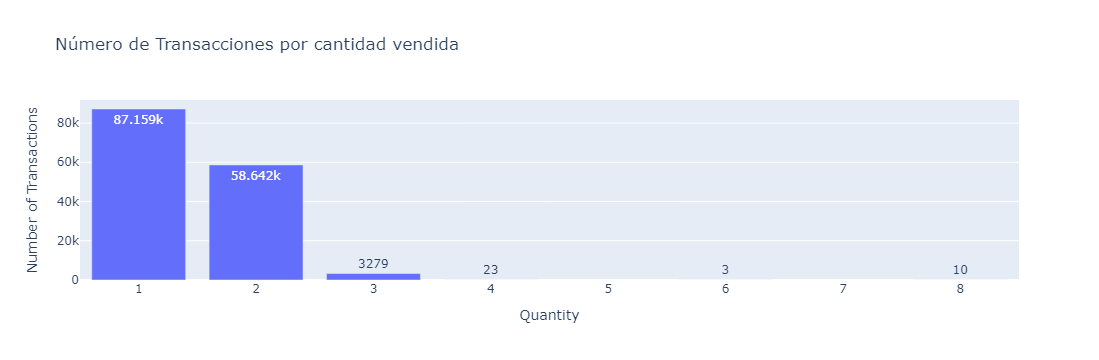

In [103]:
# Configuración gráfico
fig = px.bar(x=sales_qty.index, y=sales_qty.values,
             labels={'x': 'Quantity', 'y': 'Number of Transactions'},
             title='Número de Transacciones por cantidad vendida',
             text_auto=True)

# Mostrar el gráfico
fig.show()

- **Observación:** Podemos suponer que en la mayoría de las instancias de compra, los clientes compran entre 1 y 2 productos. En ocasiones puntuales han comprado más de 2 productos.
- **Gráfico utilizado:** Se ha utilizado un gráfico de barras vertical (librería plotly). Es amigable a simple vista y permite identificar claramente valores superiores e inferiores.

##### 4. Análisis de la Columna: **`store_location`**

In [104]:
# Revisámos valores únicos
df["store_location"].unique()

array(['Lower Manhattan', 'Astoria', "Hell's Kitchen"], dtype=object)

In [105]:
# Revisamos las transacciones totales por tienda
store_qty = df["store_location"].value_counts()
store_qty

store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64

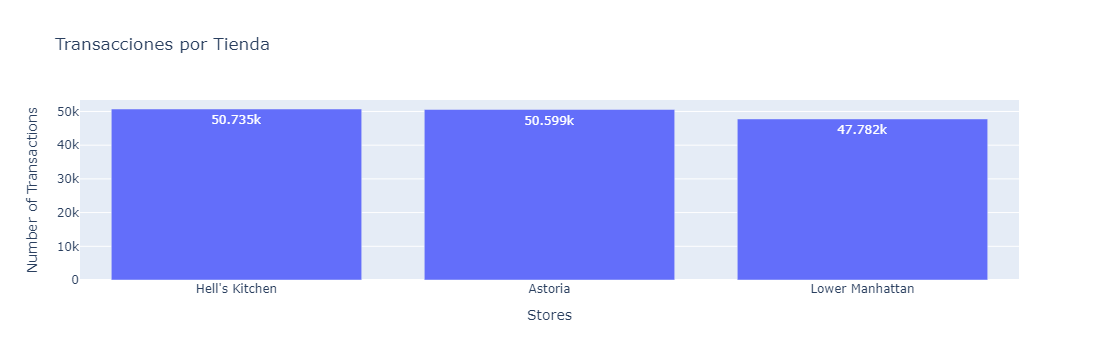

In [106]:
# Configuración gráfico
fig = px.bar(x=store_qty.index, y=store_qty.values,
             labels={'x': 'Stores', 'y': 'Number of Transactions'},
             title='Transacciones por Tienda',
             text_auto=True)

# Mostrar el gráfico
fig.show()

- **Observación:** Durante los 6 meses de registro de información, la tienda de Hell´s Kitchen es la que ha realizado la mayor cantidad de transacciones.
- **Gráfico utilizado:** Se ha utilizado un gráfico de barras vertical (librería plotly). Es amigable a simple vista y permite identificar claramente valores superiores e inferiores.

##### 5. Análisis de la Columna: **`unit_price`**

In [107]:
# Revisámos valores únicos
df["unit_price"].unique()

array([ 3.  ,  3.1 ,  2.5 ,  4.5 ,  2.  ,  4.25,  3.5 ,  2.55,  3.75,
        4.75,  3.25,  2.2 ,  4.  ,  2.45,  8.95,  0.8 , 21.  , 28.  ,
        6.4 , 18.  , 12.  , 19.75,  9.5 , 10.  , 20.45, 22.5 ,  9.25,
       14.75,  7.6 , 14.  , 10.95, 13.33, 15.  ,  4.38,  4.06,  4.69,
        5.63, 45.  , 23.  ,  2.1 ,  2.65])

<Axes: ylabel='unit_price'>

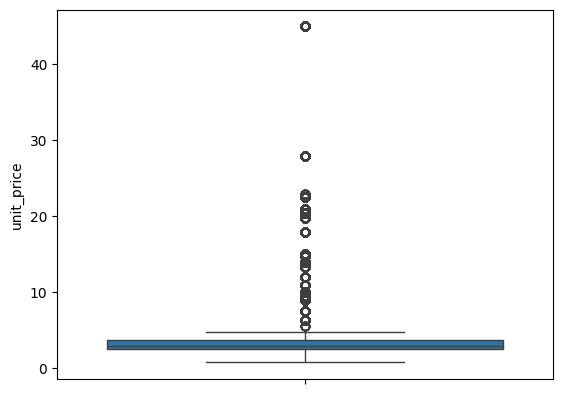

In [108]:
# Visualizamos boxplot de precios unitarios
sns.boxplot(y = "unit_price", data = df)

- **Observación:** Podríamos asumir que existen outliers en nuestros datos (columna unit_price). Sin embargo, si lo analizamos con un poco de detención, esta variación de precios debe estar relacionada a los diferentes tipos de productos que se venden en las tiendas.
- **Gráfico utilizado:** Se ha utilizado un boxplot (librería seaborn). Permite visualizar rápidamente la existencia de outliers en nuestra data.

##### 6. Análisis de la Columna: **`product_category`**

In [109]:
# Revisámos valores únicos
df["product_category"].unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Loose Tea',
       'Flavours', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [110]:
# Revisamos las transacciones totales por categoria de producto
category_qty = df["product_category"].value_counts()
category_qty

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

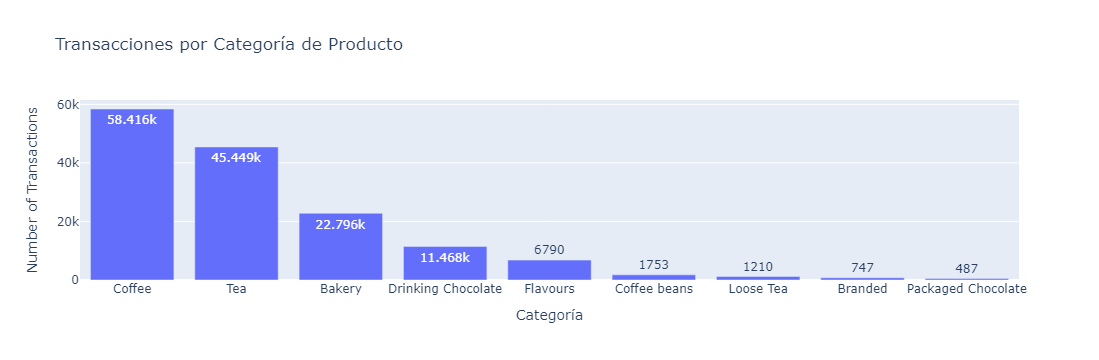

In [111]:
# Configuración gráfico
fig = px.bar(x=category_qty.index, y=category_qty.values,
             labels={'x': 'Categoría', 'y': 'Number of Transactions'},
             title='Transacciones por Categoría de Producto',
             text_auto=True)

# Mostrar el gráfico
fig.show()

- **Observación:** Podemos apreciar que las 3 categorías de productos que generan mayor cantidad de transacciones son: Coffe, Tea y Bakery.
- **Gráfico utilizado:** Se ha utilizado un gráfico de barras vertical (librería plotly). Es amigable a simple vista y permite identificar claramente valores superiores e inferiores.